### Import required packages

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../scripts')
from load_data import LoadData
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.impute import SimpleImputer
from datetime import datetime

sns.set_style("darkgrid")
%matplotlib inline

### Load the test and train datasets

In [45]:
loader = LoadData()
train_df = loader.read_csv('../data/train.csv')
test_df= loader.read_csv('../data/test.csv')
store_df= loader.read_csv('../data/store.csv')
#sample_df=loader.read_csv('../data/sample_submission.csv')

C:\Users\User\anaconda3\envs\envMysql\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [104]:
train_df.head()
train_df.shape

(1017209, 9)

In [103]:
test_df.head()
test_df.shape

(41088, 8)

In [48]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Merge the training dataset and testing dataset with the stores dataset

In [49]:
combined_train_df = pd.merge(train_df, store_df, on='Store')
combined_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [50]:
combined_test_df = pd.merge(test_df, store_df, on='Store')
combined_test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


### EDA on test and training sets

In [51]:
combined_test_df.shape

(41088, 17)

In [52]:
combined_train_df.shape

(1017209, 18)

In [53]:
#train_df.describe()

In [54]:
#train_df.isna().sum()

### Check for missing values in the dataset


In [55]:
combined_test_df.isna().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [56]:
combined_train_df.shape

(1017209, 18)

In [57]:
combined_train_df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [58]:
### Convert Date column from string to datetime
combined_test_df['Date'] = combined_test_df['Date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
combined_train_df['Date'] = combined_train_df['Date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [59]:
# #Adding Year, Day and Month as three separate features to train and set
# combined_test_df['Year'] = combined_test_df['Date'].map(lambda x: x.year)
# combined_test_df['Month'] = combined_test_df['Date'].map(lambda x: x.month)
# combined_test_df['Day'] = combined_test_df['Date'].map(lambda x: x.day)

# combined_train_df['Year'] = combined_train_df['Date'].map(lambda x: x.year)
# combined_train_df['Month'] = combined_train_df['Date'].map(lambda x: x.month)
# combined_train_df['Day'] = combined_train_df['Date'].map(lambda x: x.day)

In [60]:
combined_train_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

### Univeriate Analysis

#### test dataset

In [61]:
combined_test_df.columns.tolist()

['Id',
 'Store',
 'DayOfWeek',
 'Date',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

### Impute missing values in train in train

In [62]:
combined_train_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [63]:
imp = SimpleImputer(missing_values = np.nan, strategy="median")
combined_train_df['CompetitionDistance'] = imp.fit_transform(combined_train_df[['CompetitionDistance']])

In [64]:
combined_train_df['CompetitionOpenSinceMonth'] = imp.fit_transform(combined_train_df[['CompetitionOpenSinceMonth']])
combined_train_df['CompetitionOpenSinceYear'] = imp.fit_transform(combined_train_df[['CompetitionOpenSinceYear']])
combined_train_df['Promo2SinceWeek'] = imp.fit_transform(combined_train_df[['Promo2SinceWeek']])
combined_train_df['Promo2SinceYear'] = imp.fit_transform(combined_train_df[['Promo2SinceYear']])


In [65]:
imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
combined_train_df['PromoInterval'] = imp.fit_transform(combined_train_df[['PromoInterval']])

In [66]:
combined_train_df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Impute missing values in test dataset

In [67]:
combined_test_df.isna().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [68]:
imp = SimpleImputer(missing_values = np.nan, strategy="median")
combined_test_df['CompetitionDistance'] = imp.fit_transform(combined_test_df[['CompetitionDistance']])
combined_test_df['CompetitionOpenSinceMonth'] = imp.fit_transform(combined_test_df[['CompetitionOpenSinceMonth']])
combined_test_df['CompetitionOpenSinceYear'] = imp.fit_transform(combined_test_df[['CompetitionOpenSinceYear']])
combined_test_df['Promo2SinceWeek'] = imp.fit_transform(combined_test_df[['Promo2SinceWeek']])
combined_test_df['Promo2SinceYear'] = imp.fit_transform(combined_test_df[['Promo2SinceYear']])

In [86]:
imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
combined_test_df['Open'] = imp.fit_transform(combined_test_df[['Open']])
                                            
combined_test_df['PromoInterval'] = imp.fit_transform(combined_test_df[['PromoInterval']])

In [87]:
combined_test_df.isna().sum()

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

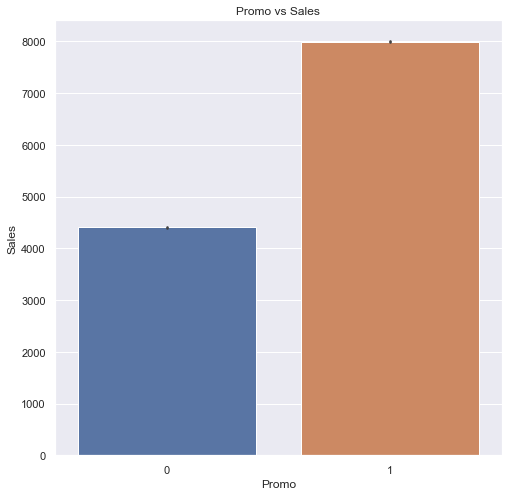

In [106]:
# Sales with respect to Promo in train dataset
sns.barplot(x='Promo', y='Sales', data=combined_train_df).set(title='Promo vs Sales')
sns.set(rc={'figure.figsize':(8,6)})
plt.show()

In [92]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"
combined_train_df["StateHoliday"].loc[combined_train_df["StateHoliday"] == 0] = "0"

C:\Users\User\anaconda3\envs\envMysql\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


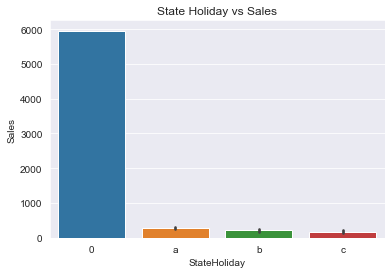

In [94]:
# Sales with respect to State Holiday
sns.barplot(x='StateHoliday', y='Sales', data=combined_train_df).set(title='State Holiday vs Sales')
plt.show()

C:\Users\User\anaconda3\envs\envMysql\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


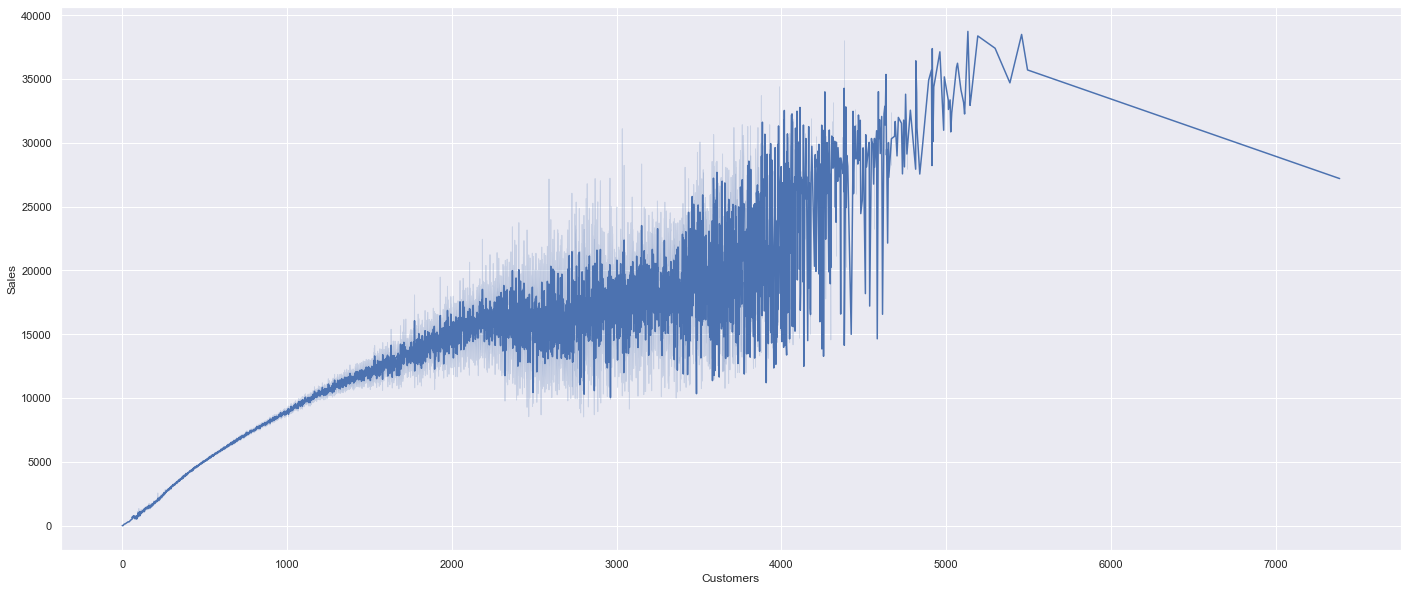

In [101]:
#sales vs number of customers
sns.lineplot(combined_train_df['Customers'], combined_train_df['Sales'])
sns.set(rc={'figure.figsize':(8,14)})
plt.show()

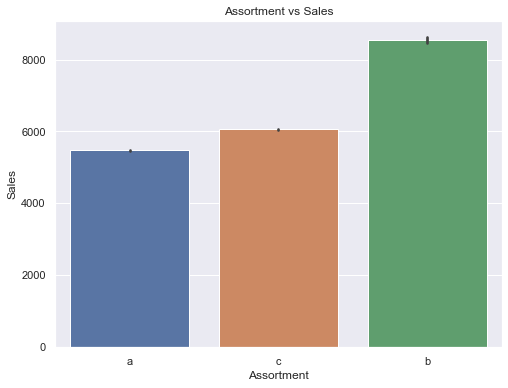

In [107]:
sns.barplot(x='Assortment', y='Sales', data=combined_train_df).set(title='Assortment vs Sales')
sns.set(rc={'figure.figsize':(6,8)})
plt.show()